<a href="https://colab.research.google.com/github/sharop/TallerGrafos24/blob/main/Clase_2_Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Caminata Trayectoria y Ciclo**

Vamos a realizar los siguientes ejemplos utilizando el grafo visto en el notebook anterior.


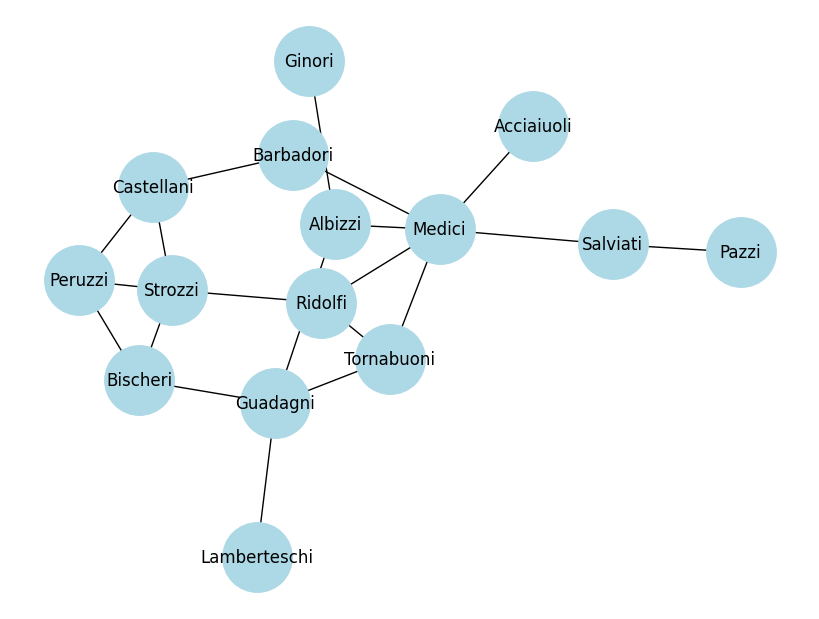

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Cargar el grafo de familias florentinas
G = nx.florentine_families_graph()

# Dibujar el grafo
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # para un diseño consistente
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500)


In [4]:
G.nodes()

NodeView(('Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi'))

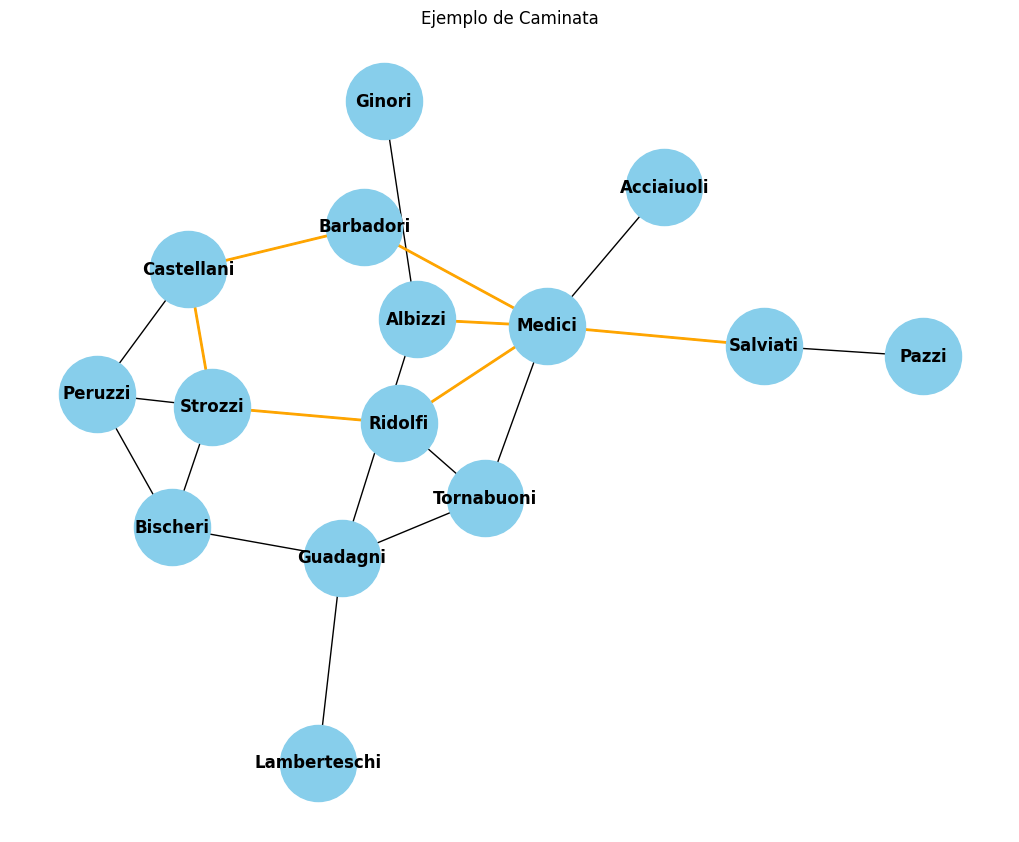

In [21]:
# Ejemplo de Caminata
walk = ["Albizzi","Medici", "Barbadori", "Castellani", "Strozzi", "Ridolfi", "Medici", "Salviati"]
walk_edges = list(zip(walk, walk[1:]))

# Visualización de la Caminata
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_color="black", font_weight="bold")
nx.draw_networkx_edges(G, pos, edgelist=walk_edges, edge_color="orange", width=2)
plt.title("Ejemplo de Caminata")
plt.show()


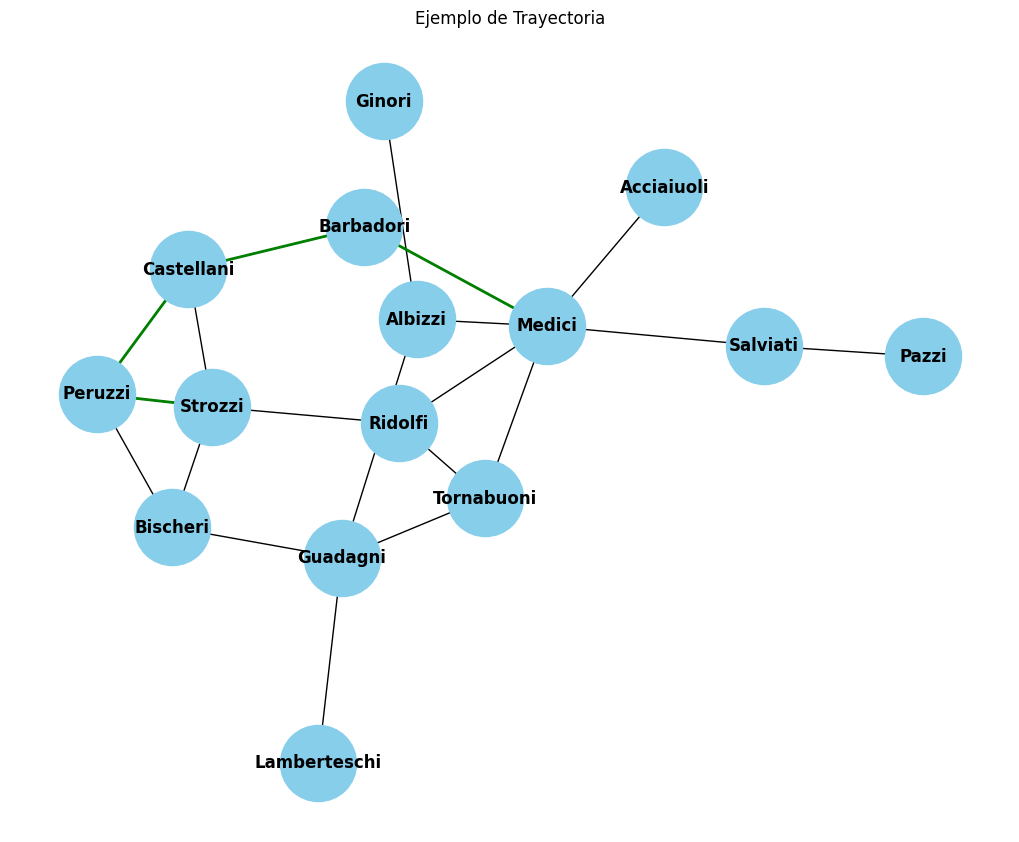

In [18]:
# Ejemplo de Trayectoria
path = ["Medici", "Barbadori", "Castellani", "Peruzzi", "Strozzi"]
path_edges = list(zip(path, path[1:]))

# Visualización de la Trayectoria
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_color="black", font_weight="bold")
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="green", width=2)
plt.title("Ejemplo de Trayectoria")
plt.show()


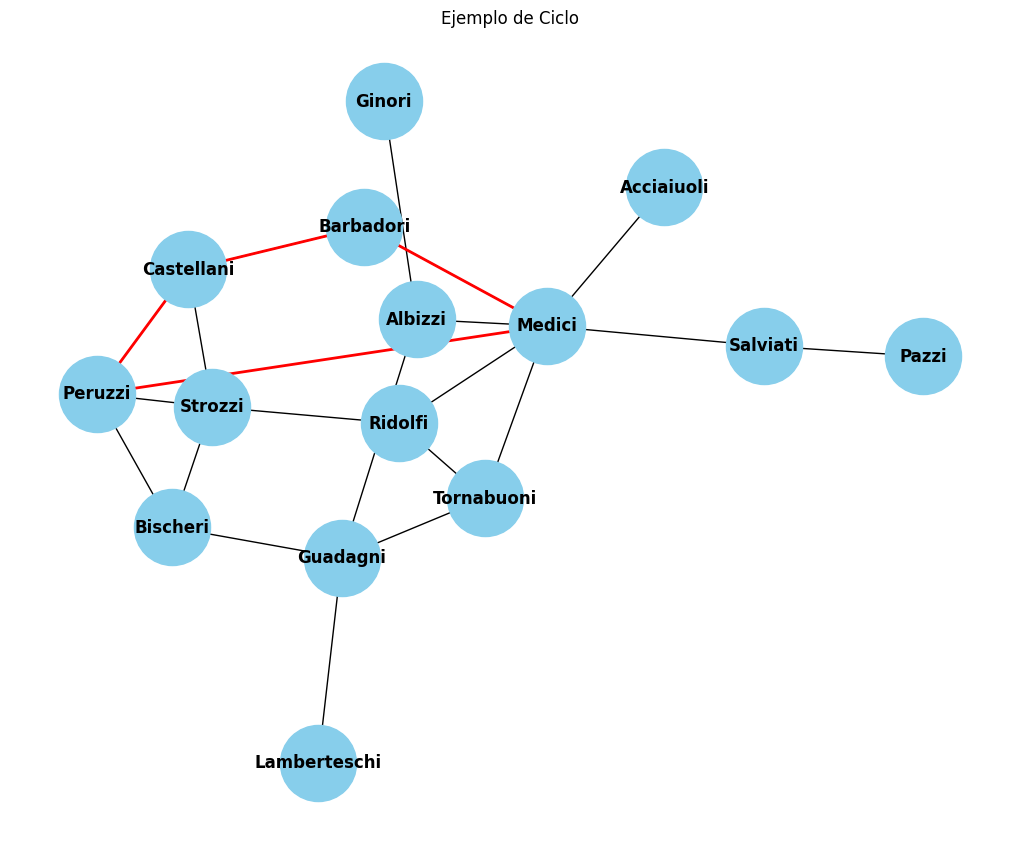

In [19]:
# Ejemplo de Ciclo
cycle = ["Medici", "Barbadori", "Castellani", "Peruzzi", "Medici"]
cycle_edges = list(zip(cycle, cycle[1:] + [cycle[0]]))

# Visualización del Ciclo
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_color="black", font_weight="bold")
nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, edge_color="red", width=2)
plt.title("Ejemplo de Ciclo")
plt.show()

# DFS
### Deteccion de Ciclos.
Este código define dos funciones, detect_cycle y dfs_cycle. detect_cycle recorre todos los nodos del grafo y llama a dfs_cycle para cada nodo que aún no ha sido visitado. dfs_cycle utiliza DFS para explorar el grafo, y si durante la exploración se encuentra un nodo que ya ha sido visitado, eso significa que hay un ciclo.

In [ ]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    for neighbor in graph[start] - visited:
        dfs(graph, neighbor, visited)
    return visited

def detect_cycle(graph):
    visited = set()
    for node in graph:
        if node not in visited:
            if dfs_cycle(graph, node, visited, -1):
                return True
    return False

def dfs_cycle(graph, node, visited, parent):
    visited.add(node)
    for neighbor in graph[node]:
        if neighbor not in visited:
            if dfs_cycle(graph, neighbor, visited, node):
                return True
        elif parent != neighbor:
            return True
    return False

graph = {'A': {'B', 'C'},
         'B': {'A', 'C', 'D'},
         'C': {'A', 'B'},
         'D': {'B'}}

print(detect_cycle(graph))



True


# BFS
### Verificación de conectividad
En este código, se usa BFS para recorrer el grafo y se verifica si todos los nodos se pueden visitar desde un nodo de inicio arbitrario. Si eso es cierto, entonces el grafo es conectado.

In [ ]:
from collections import deque

def bfs(graph, root):
    visited = set()
    queue = deque([root])

    while queue:
        vertex = queue.popleft()
        print(vertex, end=" ")

        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)

def check_connectivity(graph):
    visited = set()
    bfs(graph, list(graph.keys())[0])
    return visited == set(graph.keys())

# Definimos un grafo como un diccionario
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

print("\nEs un grafo conectado?", check_connectivity(graph))


A B C A D E F 
Es un grafo conectado? False


# Dijkstra

In [ ]:
import heapq

def dijkstra(graph, start):
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    queue = [(0, start)]
    while queue:
        current_distance, current_node = heapq.heappop(queue)
        if current_distance > distances[current_node]:
            continue
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))
    return distances

graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

print(dijkstra(graph, 'A'))


{'A': 0, 'B': 1, 'C': 3, 'D': 4}


# Bellman- Ford

In [ ]:
def bellman_ford(graph, start):
    distance, predecessor = dict(), dict()
    for node in graph:
        distance[node], predecessor[node] = float('inf'), None
    distance[start] = 0

    for _ in range(len(graph) - 1):
        for node in graph:
            for neighbour in graph[node]:
                # If the distance between the node and the neighbour is lower than the current, store it
                if distance[node] + graph[node][neighbour] < distance[neighbour]:
                    distance[neighbour], predecessor[neighbour] = distance[node] + graph[node][neighbour], node

    # Check for negative weight cycles
    for node in graph:
        for neighbour in graph[node]:
            assert distance[node] + graph[node][neighbour] >= distance[neighbour], "Negative weight cycle."

    return distance, predecessor

graph = {
    'A': {'B': -1, 'C':  4},
    'B': {'C': 3, 'D': 2, 'E': 2},
    'C': {},
    'D': {'B': 1, 'C': 5},
    'E': {'D': -3}
    }

distances, predecessors = bellman_ford(graph, 'A')
print(distances)


{'A': 0, 'B': -1, 'C': 2, 'D': -2, 'E': 1}


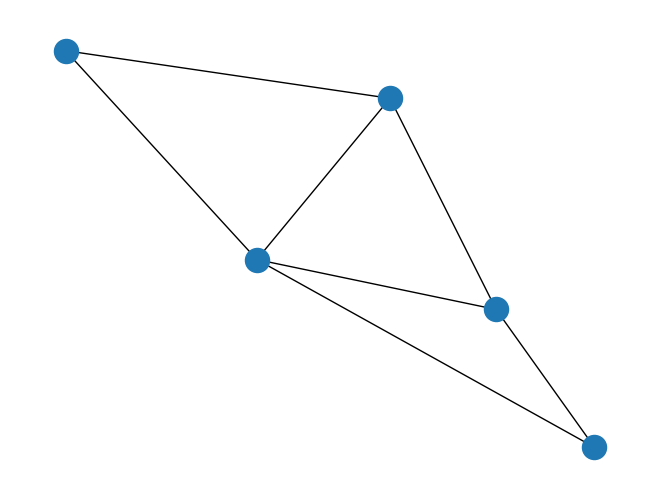

In [ ]:
# Dibujamos el grafo
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph(graph, with_labels=True, )

nx.draw(G)
plt.show()

# Eigenvector centrality

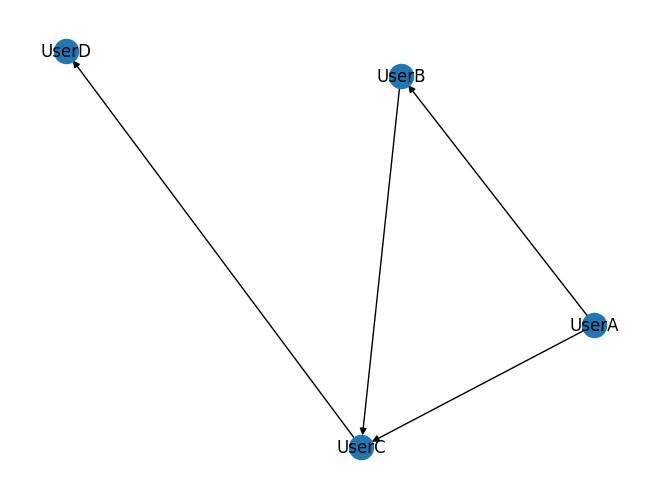

User UserA has eigenvector centrality -2.087219286295294e-13
User UserB has eigenvector centrality -1.2275319649646121e-12
User UserC has eigenvector centrality 4.70503926968159e-05
User UserD has eigenvector centrality 0.9999999988931303


In [ ]:
import networkx as nx

# Supongamos que esta lista de tuplas representa relaciones de "sigue a" en Twitter.
edges = [('UserA', 'UserB'), ('UserB', 'UserC'), ('UserA', 'UserC'), ('UserC', 'UserD')]

# Creamos un grafo dirigido a partir de las relaciones de "sigue a"
G = nx.DiGraph()
G.add_edges_from(edges)
nx.draw(G, with_labels=True,)
plt.show()

# Calculamos la centralidad de eigenvectores
centrality = nx.eigenvector_centrality_numpy(G)
#centrality = nx.eigenvector_centrality(G)

# Imprimimos la centralidad de eigenvectores para cada usuario
for user, cent in centrality.items():
    print(f'User {user} has eigenvector centrality {cent}')


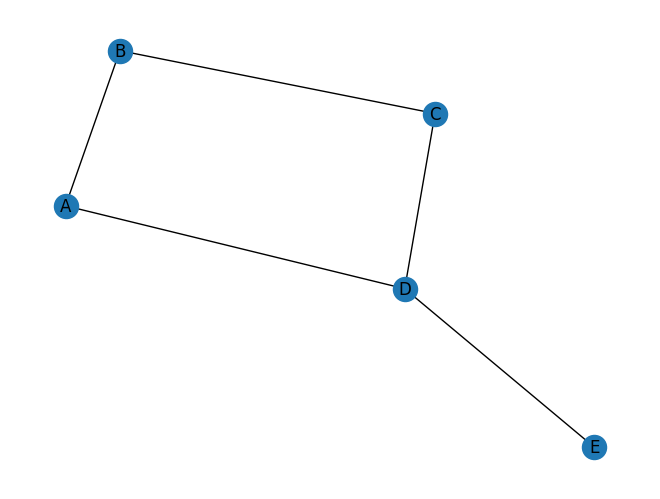

{'A': 0.46470484153902547, 'B': 0.4351612755040572, 'C': 0.46470484153902547, 'D': 0.5573460928203134, 'E': 0.26095750155914454}


In [ ]:
import networkx as nx

# Crea un grafo
G = nx.Graph()

# Añade algunos enlaces
G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.add_edge('C', 'D')
G.add_edge('D', 'E')
G.add_edge('D', 'A')

nx.draw(G, with_labels=True,)
plt.show()
# Calcula la centralidad del eigenvector
centrality = nx.eigenvector_centrality(G)

print(centrality)


# Ejemplo practico grafo con pesos.

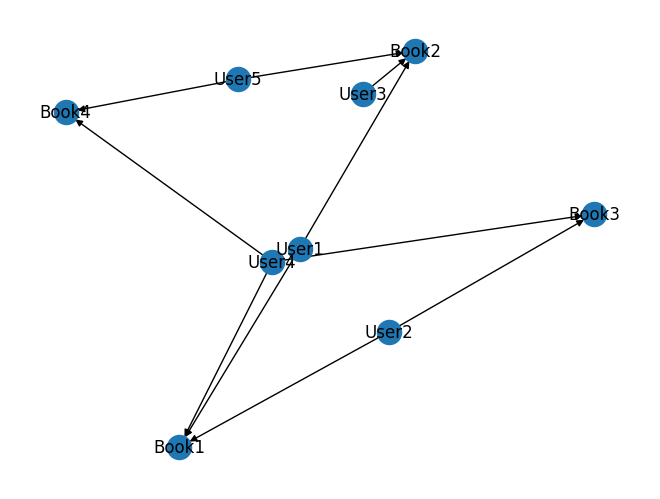

Libros recomendados: {'Book3', 'Book2', 'Book4'}


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

if __name__ == '__main__':

    G = nx.DiGraph()

    # Agregamos las aristas al grafo. Las aristas van desde el usuario al libro que calificó.
    G.add_edge('User1', 'Book1')
    G.add_edge('User1', 'Book2')
    G.add_edge('User2', 'Book1')
    G.add_edge('User2', 'Book3')
    G.add_edge('User3', 'Book2')
    G.add_edge('User4', 'Book4')
    G.add_edge('User4', 'Book1')
    G.add_edge('User4', 'Book3')
    G.add_edge('User5', 'Book2')
    G.add_edge('User5', 'Book4')

    nx.draw(G, with_labels=True)
    plt.show()

    selected_book = 'Book1'

    # Encontramos los usuarios que calificaron el libro seleccionado
    users_who_rated_selected_book = [edge[0] for edge in G.in_edges(selected_book)]

    # Encontramos otros libros que estos usuarios calificaron
    recommended_books = set()
    for user in users_who_rated_selected_book:
        books_rated_by_user = [edge[1] for edge in G.out_edges(user)]
        recommended_books.update(books_rated_by_user)

    # Eliminamos el libro seleccionado de las recomendaciones
    recommended_books.discard(selected_book)

    print("Libros recomendados:", recommended_books)


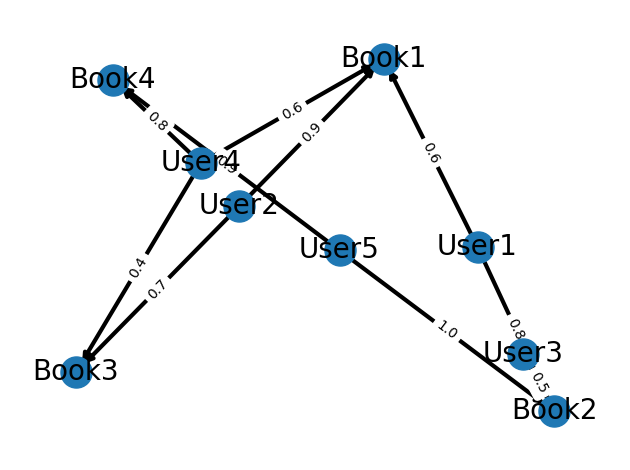

Libros recomendados: [('Book1', 0.9), ('Book4', 0.8)]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


if __name__ == '__main__':

    G = nx.DiGraph()

    # Agregamos las aristas al grafo. Las aristas van desde el usuario al libro que calificó,
    # y el peso de la arista representa el tiempo transcurrido desde que el usuario calificó el libro.
    G.add_edge('User1', 'Book1', weight=0.6)
    G.add_edge('User1', 'Book2', weight=0.8)
    G.add_edge('User2', 'Book1', weight=0.9)
    G.add_edge('User2', 'Book3', weight=0.7)
    G.add_edge('User3', 'Book2', weight=0.5)
    G.add_edge('User4', 'Book4', weight=0.8)
    G.add_edge('User4', 'Book1', weight=0.6)
    G.add_edge('User4', 'Book3', weight=0.4)
    G.add_edge('User5', 'Book2', weight=1.0)
    G.add_edge('User5', 'Book4', weight=0.9)

    pos = nx.spring_layout(G, seed=7)

    nx.draw_networkx_nodes(G, pos, node_size=500)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(data=True), width=3.0)

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    # Dibujamos el grafo
    #nx.draw(G, with_labels=True)
    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    selected_book = 'Book3'

    # Encontramos los usuarios que calificaron el libro seleccionado
    users_who_rated_selected_book = [edge[0] for edge in G.in_edges(selected_book)]

    # Encontramos otros libros que estos usuarios calificaron
    # Ahora también consideramos el tiempo transcurrido desde que calificaron el libro
    recommended_books = {}
    for user in users_who_rated_selected_book:
        books_rated_by_user = G.out_edges(user, data=True)
        for edge in books_rated_by_user:
            book = edge[1]
            weight = edge[2]['weight']
            if book in recommended_books:
                # Si el libro ya está en las recomendaciones, conservamos el mayor peso
                if weight > recommended_books[book]:
                    recommended_books[book] = weight
            else:
                recommended_books[book] = weight

    # Eliminamos el libro seleccionado de las recomendaciones
    del recommended_books[selected_book]

    # Ordenamos los libros recomendados por su peso y los imprimimos
    recommended_books = sorted(recommended_books.items(), key=lambda x: x[1], reverse=True)
    print("Libros recomendados:", recommended_books)


# PageRank

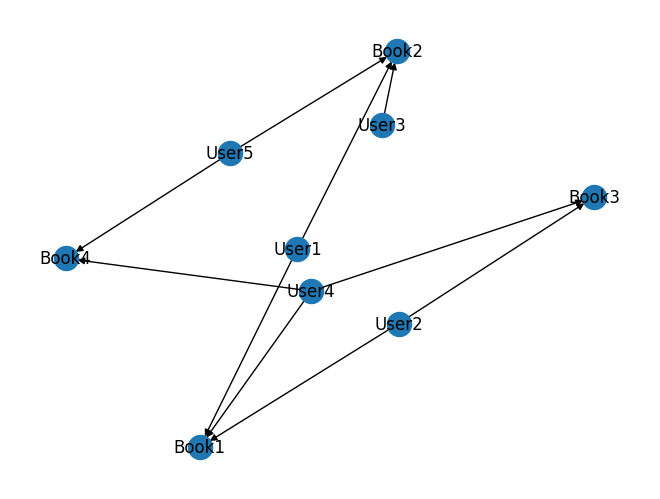

Book1: 0.1610059842369076
Book2: 0.2037730183447332
Book3: 0.1289307086560384
Book4: 0.1289307086560384


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt



if __name__ == '__main__':
    G = nx.DiGraph()

    # Agregamos las aristas al grafo. Las aristas van desde el usuario al libro que calificó.
    G.add_edge('User1', 'Book1')
    G.add_edge('User1', 'Book2')
    G.add_edge('User2', 'Book1')
    G.add_edge('User2', 'Book3')
    G.add_edge('User3', 'Book2')
    G.add_edge('User4', 'Book4')
    G.add_edge('User4', 'Book1')
    G.add_edge('User4', 'Book3')
    G.add_edge('User5', 'Book2')
    G.add_edge('User5', 'Book4')

    nx.draw(G, with_labels=True)
    plt.show()

    # Usamos el algoritmo PageRank para encontrar los libros más relevantes
    pr = nx.pagerank(G)

    # Imprimimos el PageRank de cada libro
    for node, rank in pr.items():
        if 'Book' in node:
            print(f"{node}: {rank}")



# Deteccion de comunidades

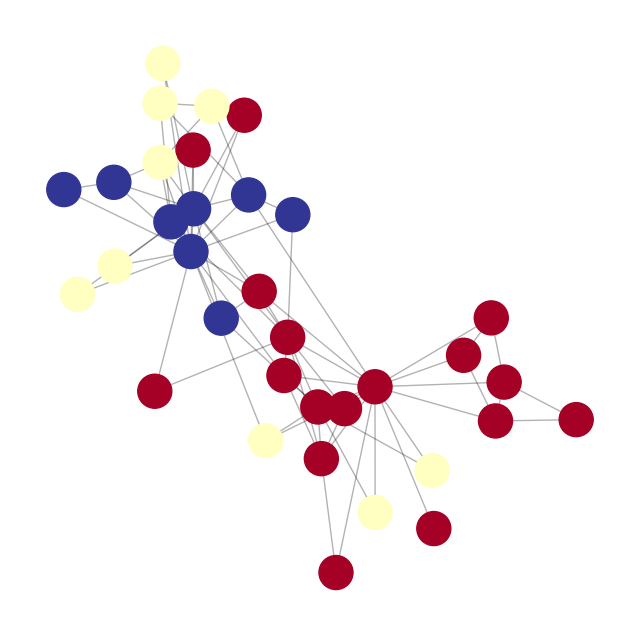

In [ ]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt

# Cargar el grafo del Karate Club
G = nx.karate_club_graph()

# Calcular las comunidades
communities = greedy_modularity_communities(G)

# Crear una partición de nodos para el coloreado
partition = {node: i for i, community in enumerate(communities) for node in community}

# Dibujar el grafo con los colores de las comunidades
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show()


# Ejercicio
Crea el siguiente grafo dirigido y calcula
* EigenVector centrality
* PageRank

Realiza una conclusion de los resultados.


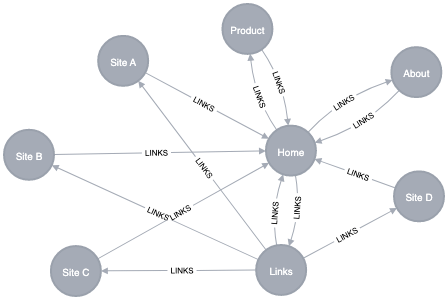